In [1]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 

dados = os.getcwd() + '/dados'
dado = nc.Dataset(dados+'/'+os.listdir(dados)[0])

In [2]:
os.listdir(dados)[0]

'era5_11-09-2021.nc'

In [20]:
arr_w = np.asarray(dado['w'])

In [27]:
arr_w[0][0][140:221][280:401]

array([], shape=(0, 601), dtype=float64)

In [41]:
w11_09_1000_aux = map(lambda item: item[280:401], arr_w[0][10][140:241])
w11_09_1000 = np.asarray(list(w11_09_1000_aux)).flatten()

w11_09_850_aux = map(lambda item: item[280:401], arr_w[0][7][140:241])
w11_09_850 = np.asarray(list(w11_09_850_aux)).flatten()

w11_09_700_aux = map(lambda item: item[280:401], arr_w[0][4][140:241])
w11_09_700 = np.asarray(list(w11_09_700_aux)).flatten()

w11_09_500_aux = map(lambda item: item[280:401], arr_w[0][0][140:241])
w11_09_500 = np.asarray(list(w11_09_500_aux)).flatten()

In [39]:
# dia 11/09 -> niveis 1000; 850; 700; 500
#            -> recorte 20-40S / 30-60W
dado['latitude'][140:221] # -> essa eh a faixa de latitudes a ser utilizada pro dia 11/09

masked_array(data=[-20.  , -20.25, -20.5 , -20.75, -21.  , -21.25, -21.5 ,
                   -21.75, -22.  , -22.25, -22.5 , -22.75, -23.  , -23.25,
                   -23.5 , -23.75, -24.  , -24.25, -24.5 , -24.75, -25.  ,
                   -25.25, -25.5 , -25.75, -26.  , -26.25, -26.5 , -26.75,
                   -27.  , -27.25, -27.5 , -27.75, -28.  , -28.25, -28.5 ,
                   -28.75, -29.  , -29.25, -29.5 , -29.75, -30.  , -30.25,
                   -30.5 , -30.75, -31.  , -31.25, -31.5 , -31.75, -32.  ,
                   -32.25, -32.5 , -32.75, -33.  , -33.25, -33.5 , -33.75,
                   -34.  , -34.25, -34.5 , -34.75, -35.  , -35.25, -35.5 ,
                   -35.75, -36.  , -36.25, -36.5 , -36.75, -37.  , -37.25,
                   -37.5 , -37.75, -38.  , -38.25, -38.5 , -38.75, -39.  ,
                   -39.25, -39.5 , -39.75, -40.  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [40]:
dado['longitude'][280:401] # -> essa eh a faixa de longitudes a ser utilizada pro dia 11/09

masked_array(data=[-60.  , -59.75, -59.5 , -59.25, -59.  , -58.75, -58.5 ,
                   -58.25, -58.  , -57.75, -57.5 , -57.25, -57.  , -56.75,
                   -56.5 , -56.25, -56.  , -55.75, -55.5 , -55.25, -55.  ,
                   -54.75, -54.5 , -54.25, -54.  , -53.75, -53.5 , -53.25,
                   -53.  , -52.75, -52.5 , -52.25, -52.  , -51.75, -51.5 ,
                   -51.25, -51.  , -50.75, -50.5 , -50.25, -50.  , -49.75,
                   -49.5 , -49.25, -49.  , -48.75, -48.5 , -48.25, -48.  ,
                   -47.75, -47.5 , -47.25, -47.  , -46.75, -46.5 , -46.25,
                   -46.  , -45.75, -45.5 , -45.25, -45.  , -44.75, -44.5 ,
                   -44.25, -44.  , -43.75, -43.5 , -43.25, -43.  , -42.75,
                   -42.5 , -42.25, -42.  , -41.75, -41.5 , -41.25, -41.  ,
                   -40.75, -40.5 , -40.25, -40.  , -39.75, -39.5 , -39.25,
                   -39.  , -38.75, -38.5 , -38.25, -38.  , -37.75, -37.5 ,
                   -37.25

In [48]:
dado['level'][10]

masked_array(data=1000,
             mask=False,
       fill_value=999999,
            dtype=int32)

In [56]:
medias  = [np.mean(w11_09_1000), np.mean(w11_09_850), np.mean(w11_09_700), np.mean(w11_09_500)]
niveis = [1000, 850, 700, 500]

Text(0.5, 1.0, 'Média de w na região de interesse para o dia 11/09')

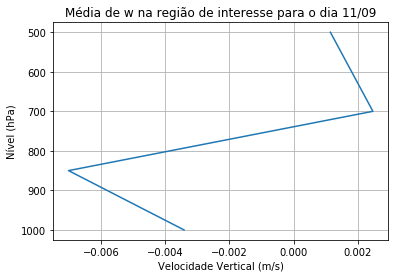

In [74]:
plt.plot(medias, niveis)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('Nível (hPa)')
ax.set_xlabel('Velocidade Vertical (m/s)')
ax.grid()
plt.title('Média de w na região de interesse para o dia 11/09')

In [3]:
nc.num2date(dado.variables['time'][:].data, dado.variables['time'].units, dado.variables['time'].calendar) 
# ai estao as datas d

array([cftime.DatetimeGregorian(2021, 9, 11, 6, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 9, 11, 9, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 9, 11, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 9, 11, 15, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 9, 11, 18, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 9, 11, 21, 0, 0, 0, has_year_zero=False)],
      dtype=object)

In [52]:
dado['w'][0][0][0][0]

0.07577403596233667

In [63]:
dado['time'][0]

masked_array(data=1066758,
             mask=False,
       fill_value=999999,
            dtype=int32)

In [48]:
dado['level'][1] # o level comeca no nivel de 500 e vai descendo de 50 em 50 ate chegar em 1000

masked_array(data=550,
             mask=False,
       fill_value=999999,
            dtype=int32)

In [22]:
dado.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (601,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (301,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'level': <class 'netCDF4._netCDF4.Variable'>
 int32 level(level)
     units: millibars
     long_name: pressure_level
 unlimited dimensions: 
 current shape = (11,)
 filling on, default _FillValue of -2147483647 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (6,)
 filling on, default _FillValue of -2147483647 used,
 'd': <class 'netCDF4._netCDF4.Variable'>
 int